In [1]:
import os
from main_baseline import DataPrep, EDA, FeatureEngineer, Model
from dotenv import load_dotenv
load_dotenv()

import pygwalker as pyg

# from pandasai import Aget
# os.environ["PANDASAI_API_KEY"] = os.getenv('pandas_ai_api')

# agent = Agent(df)
# agent.chat('Which are the top 5 countries by sales?')
# pandas_ai.run(df, prompt='Plot the histogram of GDP for each country.')


# walker = pyg.walk(
#     df,
#     spec="./chart_meta_0.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
#     kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
# )

#### Init Data Prep.. 
#### Init Feature Engineering... 
#### Init Model Train... 
Train data shape :  (1118822, 52) Test data shape :  (9272, 51)
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   

   ...    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0  ...  4858.0  262.0                  임의  2022-11-17 13:00:29.0      Y   

  관리비 업로드        좌표X        좌표Y                  단지신청일  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  202307   26  5  1987   

   ... 청소비관리형태    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일  \
0  ...      직영  4858.0  262.0                  임의  2022-11-17 13:00:29.0   

  사용허가여부 관리비 업로드        좌표X        좌표Y                  단지신청일  
0      Y       N  

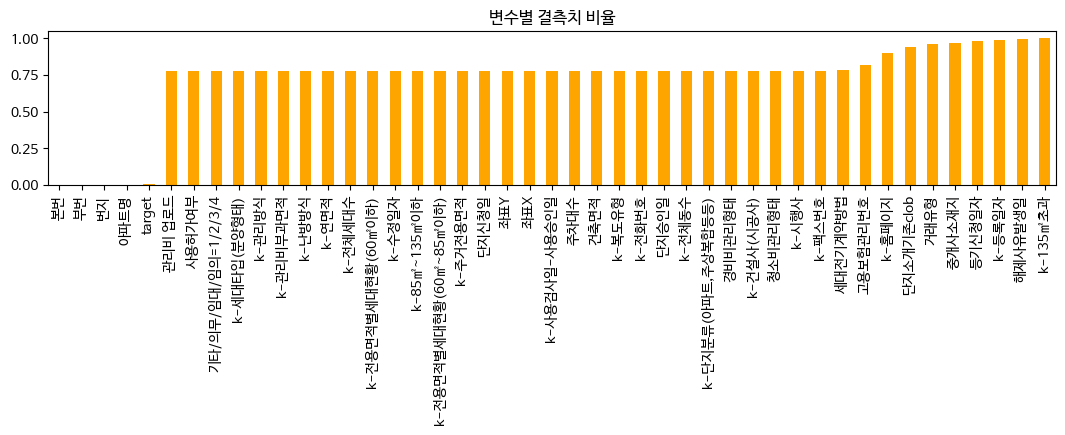

* 결측치가 100만개 이하인 변수들 : ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test']
* 결측치가 100만개 이상인 변수들 : ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null

0    1029574
1       9272
Name: is_test, dtype: int64

In [2]:
base_path = '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4'
out_path = os.path.join(base_path,'output')
config ={'out_path':out_path}

data_prep = DataPrep(config)
feat_eng = FeatureEngineer(config)
model_instance = Model(config)
df = data_prep.load_data(base_path)
df = data_prep.prep_null(df)
df = data_prep.prep_inter(df)
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
cols = ['계약년', '전용면적', '강남여부', '구', '건축년도', '좌표X', '좌표Y', '동']
df = data_prep.remove_outliers_iqr(df, '전용면적')
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(df.shape)
df['is_test'].value_counts()     # 또한, train data만 제거되었습니다.


In [ ]:

#### Feat eng
df = feat_eng.prep_feat(df)

df_coor = {'x': '좌표X', 'y': '좌표Y'}
df_subway = data_prep.load_feat_data(os.path.join(base_path, 'data','subway_feature.csv'))
df_bus = data_prep.load_feat_data(os.path.join(base_path, 'data','bus_feature.csv'))

subway_coor = {'x': '위도', 'y': '경도'}
bus_coor = {'x': 'X좌표', 'y': 'Y좌표'}


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target',
       'is_test', '구', '동', '계약년', '계약월'],
      dtype='object')
Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수'

In [4]:

df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_subway, subway_coor, 'subway')
df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_bus, bus_coor, 'bus')

  4%|▎         | 37/1039 [00:02<01:21, 12.35it/s]


KeyboardInterrupt: 

In [3]:
import pandas as pd
path_feat = os.path.join(out_path, 'data_feature_bus_subway.csv')
# df.to_csv(path_feat,  index=False)

df = pd.read_csv(path_feat)#, index_col=False)
df.head()


,Unnamed: 0,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,...,target,is_test,구,동,계약년,계약월,강남여부,신축여부,distance_sum_subway,distance_sum_bus
0,0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,...,124000.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
1,1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,...,123500.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
2,2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,...,91500.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
3,3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,...,130000.0,0,강남구,개포동,2018,1,1,0,97229.588688,1696.099718
4,4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,...,117000.0,0,강남구,개포동,2018,1,1,0,97229.588688,1696.099718


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

### split
dt_train, dt_test, continuous_columns_v2, categorical_columns_v2 = feat_eng.split_train_test(df)


print(dt_train.dtypes)
# dt_train.fillna('missing', inplace=True) 
dt_train, label_encoders = feat_eng.encode_label(dt_train, dt_test, continuous_columns_v2, categorical_columns_v2)

(1029574, 43) (9272, 43)
연속형 변수: ['전용면적', '계약년월', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target']
범주형 변수: ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']
번지                         object
본번                         object
부번                         object
아파트명                       object
전용면적                      float64
계약년월                        int64
계약일                         int64
층                           int64
건축년도                        int64
도로명                        object
k-단지분류(아파트,주상복합등등)         object
k-전화번호                     object
k-팩스번호                     object
k-세대타입(분양형태)               object
k-관리방식 

100%|██████████| 25/25 [00:06<00:00,  4.05it/s]


In [4]:

X_train, X_val, y_train, y_val = feat_eng.split_dataset(dt_train)

prep_data = {'X_train': X_train,
            'X_val': X_val,
            'y_train': y_train,
            'y_val': y_val,
            'continuous_columns': continuous_columns_v2,
            'categorical_columns': categorical_columns_v2
}
out_path_data = model_instance.save_data(prep_data)
# loaded_data = load_data_pkl(out_path_data)
# print(loaded_data)


Dataset Saved to  /data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/output/prep_data.pkl


In [5]:
X_train.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [ ]:

model, pred = model_instance.model_train(X_train, X_val, y_train, y_val, 'k_fold')
feat_eng.select_var(model, X_val, y_val, pred, label_encoders, categorical_columns_v2)

In [ ]:
import pickle

# model_name = 'XGB'
# type = 'k_fold'
# out_model_path = os.path.join(out_path, f'saved_model_{model_name}_{type}.pkl')

# with open(out_model_path, 'rb') as f:
#     model = pickle.load(f)

X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)
#real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv(os.path.join(out_path,'output.csv'), index=False)

# Inference

In [ ]:

model_instance.inference(dt_test)